<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Técnicas-de-aprendizaje-supervisado" data-toc-modified-id="Técnicas-de-aprendizaje-supervisado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Técnicas de aprendizaje supervisado</a></span><ul class="toc-item"><li><span><a href="#Practica-de-Intercomparación-aplicada-a-datos-meteorológicos" data-toc-modified-id="Practica-de-Intercomparación-aplicada-a-datos-meteorológicos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Practica de Intercomparación aplicada a datos meteorológicos</a></span><ul class="toc-item"><li><span><a href="#Santander-Meteorology-Group" data-toc-modified-id="Santander-Meteorology-Group-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Santander Meteorology Group</a></span></li></ul></li></ul></li><li><span><a href="#Conjunto-de-datos-meteo" data-toc-modified-id="Conjunto-de-datos-meteo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Conjunto de datos meteo</a></span></li><li><span><a href="#Árboles-de-clasificación-y-regresión-(2.5-puntos)" data-toc-modified-id="Árboles-de-clasificación-y-regresión-(2.5-puntos)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Árboles de clasificación y regresión (2.5 puntos)</a></span></li><li><span><a href="#Random-forests-(2.5-puntos)" data-toc-modified-id="Random-forests-(2.5-puntos)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random forests (2.5 puntos)</a></span></li><li><span><a href="#Modelos-lineales-generalizados-(GLMs)-(1.5-puntos)" data-toc-modified-id="Modelos-lineales-generalizados-(GLMs)-(1.5-puntos)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelos lineales generalizados (GLMs) (1.5 puntos)</a></span></li><li><span><a href="#k-nearest-neighbors-(k-NN)-(1.5-puntos)" data-toc-modified-id="k-nearest-neighbors-(k-NN)-(1.5-puntos)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>k nearest neighbors (k-NN) (1.5 puntos)</a></span></li><li><span><a href="#Conclusiones-generales-(2-puntos)" data-toc-modified-id="Conclusiones-generales-(2-puntos)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones generales (2 puntos)</a></span></li><li><span><a href="#k-nearest-neighbors-(k-NN)" data-toc-modified-id="k-nearest-neighbors-(k-NN)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>k nearest neighbors (k-NN)</a></span><ul class="toc-item"><li><span><a href="#(1.5-puntos)" data-toc-modified-id="(1.5-puntos)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>(1.5 puntos)</a></span></li></ul></li><li><span><a href="#Conclusiones-generales" data-toc-modified-id="Conclusiones-generales-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusiones generales</a></span><ul class="toc-item"><li><span><a href="#(2-puntos)" data-toc-modified-id="(2-puntos)-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>(2 puntos)</a></span></li></ul></li></ul></div>

# Minería de Datos (Master en Data Science, UIMP-UC)

## Técnicas de aprendizaje supervisado

### Practica de Intercomparación aplicada a datos meteorológicos

#### Santander Meteorology Group

En esta práctica haremos una intercomparación de varias de las técnicas de aprendizaje supervisado vistas a lo largo de la asignatura (CART, k-NN, GLMs y Random Forests). Por tanto, pretende ser un repaso general de cara al examen en el que el objetivo es tratar de entender las ventajas y limitaciones de las distintas técnicas para un caso de aplicación particular; la predicción de precipitación. La entrega consistirá en un notebook (Jupyter o R-Markdown), junto con el archivo html que éste genera. Ambos ficheros se entregarán a través del Moodle de la asignatura en la tarea correspondiente.

## Conjunto de datos meteo

Comenzaremos cargando el dataset meteo, que ya ha sido utilizado en sesiones anteriores. Como ya sabéis, la variable objetivo en este dataset es la precipitation diaria en Lisboa durante el período 1979-2008, y para modelizar ésta se dispone de un conjunto de 8 variables meteorológicas predictoras que describen la circulación de larga escala definidas sobre un dominio geográfico que incluye 40 puntos sobre la Península Ibérica. (en total 8×40=320 variables explicativas). Las variables predictoras son:

* altura geopotencial en 500 hPa (Z500)
* temperatura del aire en 850 hPa, 700 hPa, 500 hPa (ta850, ta700 y ta500), y en superficie (tas)
* humedad específica del aire en 850 hPa y 500 hPa (hus850, hus500)
* presión a nivel del mar (psl)

Para agilizar los tiempos de cómputo, reduciremos la dimensionalidad del problema. Como ya se ha visto en sesiones anteriores, una alternativa para tal fin es el uso de PCs. Sin embargo, para no limitar la interpretabilidad de los resultados obtenidos con árboles, utilizaremos otra aproximación aquí. En concreto, optaremos por un análisis de correlaciones, en el que se calcula la correlación de Spearman entre nuestra variable objetivo y todas las variables predictoras disponibles. La asunción de partida es que cuanto más fuerte sea esta correlación, mayor es el vínculo físico entre predictando y predictor, y por tanto, más útil es la información que nos aporta ese predictor. Por tanto, este análisis nos permite descartar predictores poco relevantes. Siguiendo esta idea, calcularemos la correlación existente entre nuestro predictando y los 320 predictores, y eliminaremos aquellos con correlaciones entre -0.4 y 0.4. ¿Cuánto se ha reducido la dimensionalidad del problema?

In [1]:
# Imponemos una seed para no tener que cambiar las conclusiones cada vez que se ejecute el código
set.seed(4312586)

In [2]:
# Leemos los datos
data = read.csv("meteo.csv", header = T)
data = data[, -1] #Eliminamos la primera columna, índice
# Calculamos la matriz de correlación con el dataset completo
correlation = cor(data[,-1], y = data[,1], method = "spearman")
n = 5000
df = data.frame(data[1:n, c(1, which(abs(correlation)>0.4) + 1)])
str(df)

'data.frame':	5000 obs. of  38 variables:
 $ y   : num  10.9 0.6 13 0 0 1.2 1.1 0 0 0.7 ...
 $ X1  : num  57043 56963 56523 54628 53584 ...
 $ X2  : num  56535 56493 55971 53980 53391 ...
 $ X3  : num  55884 55931 55304 53494 53310 ...
 $ X4  : num  55176 55340 54498 53073 53293 ...
 $ X5  : num  54458 54769 53725 52616 53340 ...
 $ X6  : num  56980 56857 56515 54776 53782 ...
 $ X7  : num  56461 56362 55978 54089 53498 ...
 $ X8  : num  55800 55777 55327 53517 53307 ...
 $ X9  : num  55051 55164 54570 53013 53213 ...
 $ X10 : num  54319 54585 53863 52501 53157 ...
 $ X12 : num  56368 56187 55965 54205 53674 ...
 $ X13 : num  55721 55587 55360 53594 53378 ...
 $ X14 : num  54946 54947 54646 53021 53200 ...
 $ X15 : num  54145 54367 53999 52451 53055 ...
 $ X18 : num  55559 55360 55339 53657 53529 ...
 $ X19 : num  54788 54690 54720 53074 53260 ...
 $ X20 : num  53973 54125 54110 52486 53065 ...
 $ X24 : num  54555 54384 54695 53144 53383 ...
 $ X25 : num  53771 53843 54135 52556 53162 

In [3]:
# Separamos en conjuntos de Train y Test
p = 0.75
indtrain = sample(1:n, round(p*n))
indtest = setdiff(1:n, indtrain)
dfTrain = df[indtrain, ]
dfTest = df[indtest, ]
dim(dfTrain)
dim(dfTest)

[1] 3750   38

[1] 1250   38

Para simplificar aún más los cálculos, nos limitaremos a los primeros 5000 días del dataset. Como siempre, consideraremos una partición de la muestra en dos subconjuntos independientes, train y test, escogidos aleatoriamente (75% para entrenar y 25% para validar).

## Árboles de clasificación y regresión (2.5 puntos)

#### Como ya hemos visto en sesiones anteriores, tendremos que crear dos modelos independientes, uno para la clasificación del evento binario lluvia/no lluvia y otro para el evento continuo cantidad de lluvia. Nos centramos en primer lugar en la clasificación lluvia/no lluvia. Para ello, tenemos que crear la variable binaria ocurrencia de precipitación (considera un umbral de 1 mm) y construir el dataframe asociado al problema.

#### A continuación construiremos el árbol completo (usa la función tree). ¿Cuántos nodos terminales obtienes? ¿Qué variables predictoras dan lugar a las primeras subdivisiones del árbol?

In [4]:
# Cargamos paquetes
library(tree)
library(rpart)

In [5]:
# Occurencia binaria de lluvia con umbral 1mm
yocc = df$y
yocc[which(df$y < 1)] = 0
yocc[which(df$y >= 1)] = 1
yocc = as.factor(yocc)
df_occ_Train = data.frame(yocc_Train = yocc[indtrain], dfTrain[,-1])
df_occ_Test = data.frame(yocc_Test = yocc[indtest], dfTest[,-1])


Classification tree:
tree(formula = yocc_Train ~ ., data = df_occ_Train, mincut = 1, 
    minsize = 2, mindev = 0)
Number of terminal nodes:  294 
Residual mean deviance:  0 = 0 / 3456 
Misclassification error rate: 0 = 0 / 3750 

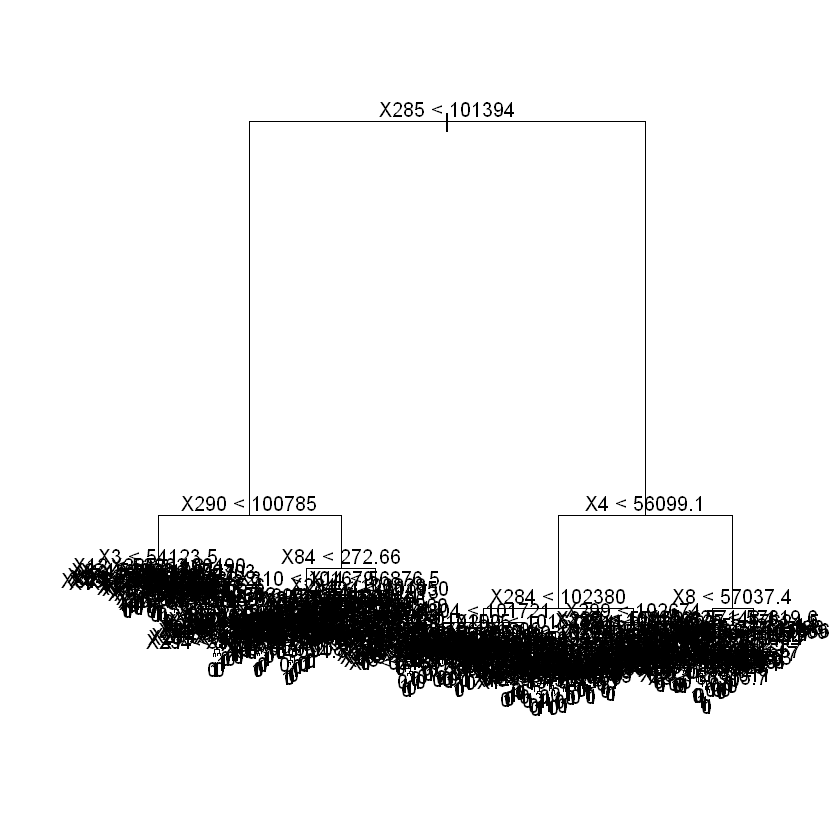

In [6]:
# Creamos el árbol
completeTree_occ = tree(yocc_Train ~., df_occ_Train,
                    mincut = 1, minsize = 2, mindev = 0)
plot(completeTree_occ); text(completeTree_occ, pretty = F)
summary(completeTree_occ)

En total obtenemos 294 nodos terminales. Como se puede apreciar en el gráfico, las variables predictoras con mayor capacidad de discriminación son X285, X290 y X4, ya que se encuentran en los primeros niveles.

#### Para simplificar este árbol tan complejo tendremos que podarlo adecuadamente. Utiliza una cross-validación con un 10-fold para encontrar el número de nodos terminales del árbol óptimo. ¿Cuál es este número? ¿Qué predictores aparecen como los más importantes?

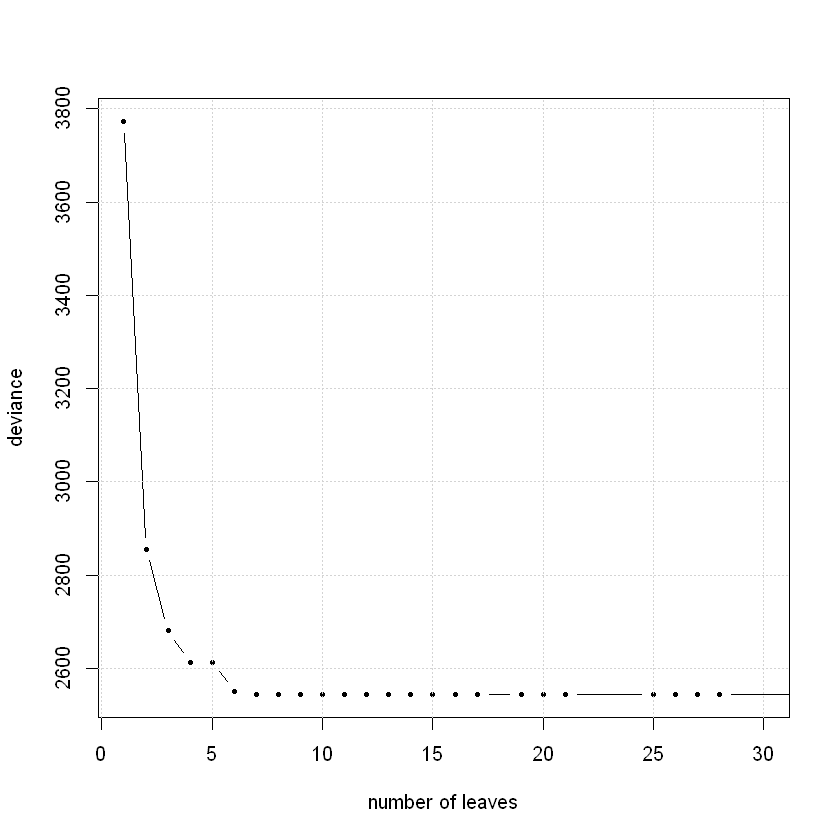

In [7]:
# Crossvalidation 10-fold
crossval_occ = cv.tree(completeTree_occ, K = 10)
plot(crossval_occ$size, crossval_occ$dev, type = "b",
     pch = 19, cex = 0.5, xlim = c(1,30),
     xlab = "number of leaves", ylab = "deviance")
grid()

Tras hacer la crossvalidación se puede observar que el número óptimo de hojas es 6. En base a este número de hojas, podemos podar el árbol completo para obtener el árbol óptimo, de donde podremos extraer los predictores más importantes, que se piden en el enunciado.


Classification tree:
snip.tree(tree = completeTree_occ, nodes = c(15L, 11L, 4L, 14L, 
6L, 10L))
Variables actually used in tree construction:
[1] "X285" "X290" "X84"  "X4"   "X8"  
Number of terminal nodes:  6 
Residual mean deviance:  0.6425 = 2406 / 3744 
Misclassification error rate: 0.1341 = 503 / 3750 

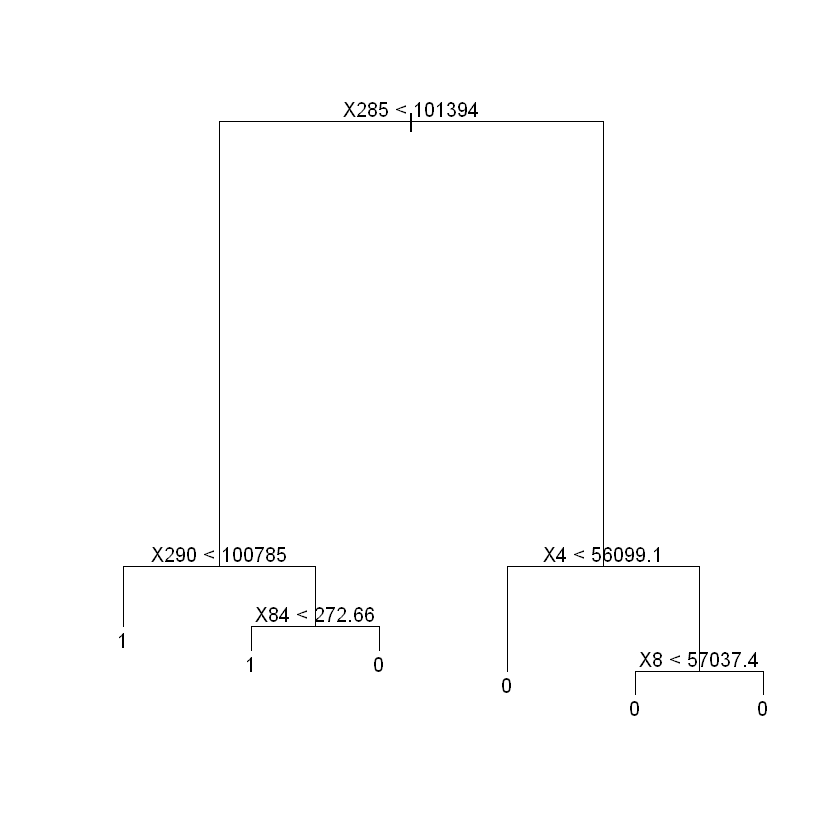

In [8]:
# Podamos el árbol completo para obtener el óptimo
n = 6
optTree_occ = prune.tree(completeTree_occ, best = n)
plot(optTree_occ); text(optTree_occ)
summary(optTree_occ)

Nuevamente, los predictores más importantes son las variables X285, X294 y X4. Observamos que X8 y X84 también tienen importancia.

#### Utiliza este árbol óptimo para predecir en el test. Guarda las predicciones.

In [9]:
# Predecimos sobre el conjunto de test
pred_opt_occ = predict(optTree_occ, df_occ_Test, type = "class")
str(pred_opt_occ)

 Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 2 2 ...


#### Una vez obtenidas las predicciones de ocurrencia pasaremos a estimar la cantidad de precipitación. Primero creamos el dataset correspondiente.

#### A continuación construiremos dos árboles, uno entrenado sobre todo el conjunto de train y otro entrenado sólo sobre los días de lluvia (en el train). Empezamos por el primero de estos árboles. Construye el árbol completo ¿Cuántos nodos terminales obtienes? ¿Qué variables predictoras dan lugar a las primeras subdivisiones del árbol? ¿Son las mismas que para el caso de la ocurrencia?

In [10]:
# Creamos el dataset para el primer árbol (todo el conjunto)
df_all_Train = dfTrain
df_all_Test = dfTest


Regression tree:
tree(formula = y ~ ., data = df_all_Train, mincut = 1, minsize = 2, 
    mindev = 0)
Number of terminal nodes:  956 
Residual mean deviance:  0.002833 = 7.917 / 2794 
Distribution of residuals:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.2667000 -0.0050000 -0.0002805  0.0000000  0.0000000  0.3000000 

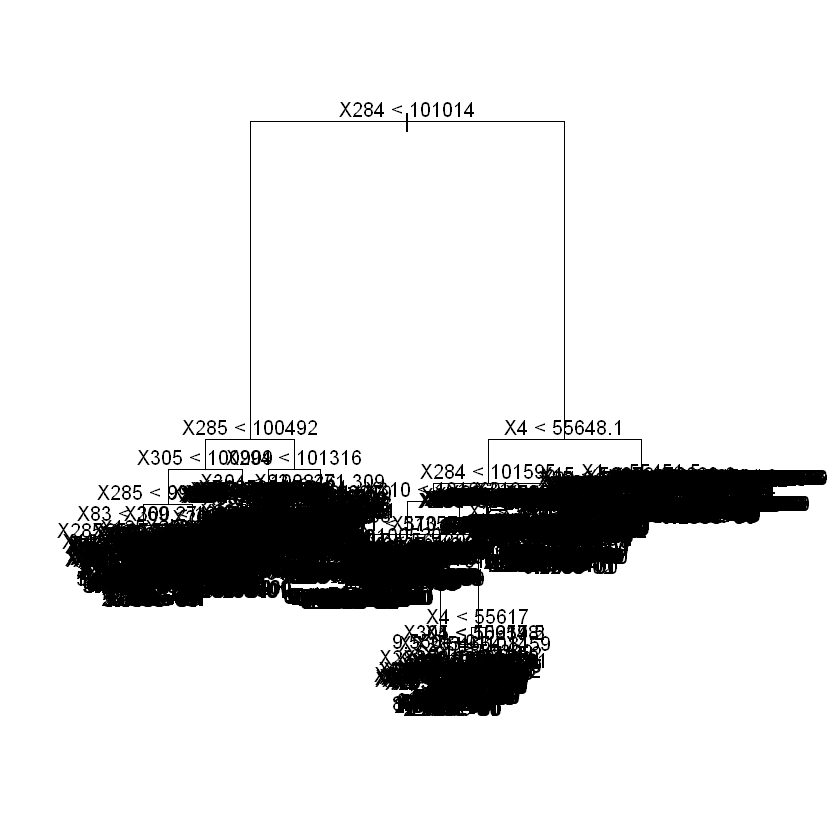

In [11]:
# Construimos el árbol completo
completeTree_all = tree(y ~., df_all_Train,
                    mincut = 1, minsize = 2, mindev = 0)
plot(completeTree_all); text(completeTree_all, pretty = F)
summary(completeTree_all)

En este caso obtenemos 956 nodos terminales (un número de hojas significativamente mayor en comparación con el caso binario, debido al carácter continuo del problema), siendo X284, X285 y X4 las variables predictoras más importantes. Esto difiere del árbol anterior de ocurrencia, ya que ahora es X284 la que mayor poder discriminatorio tiene.

#### Al igual que hicimos para el caso de la ocurrencia, tendremos que podar este árbol tan complejo. Utiliza una cross-validación con un 10-fold para encontrar el número de nodos terminales del árbol óptimo. ¿Cuál es este número? ¿Qué predictores aparecen como los más importantes?

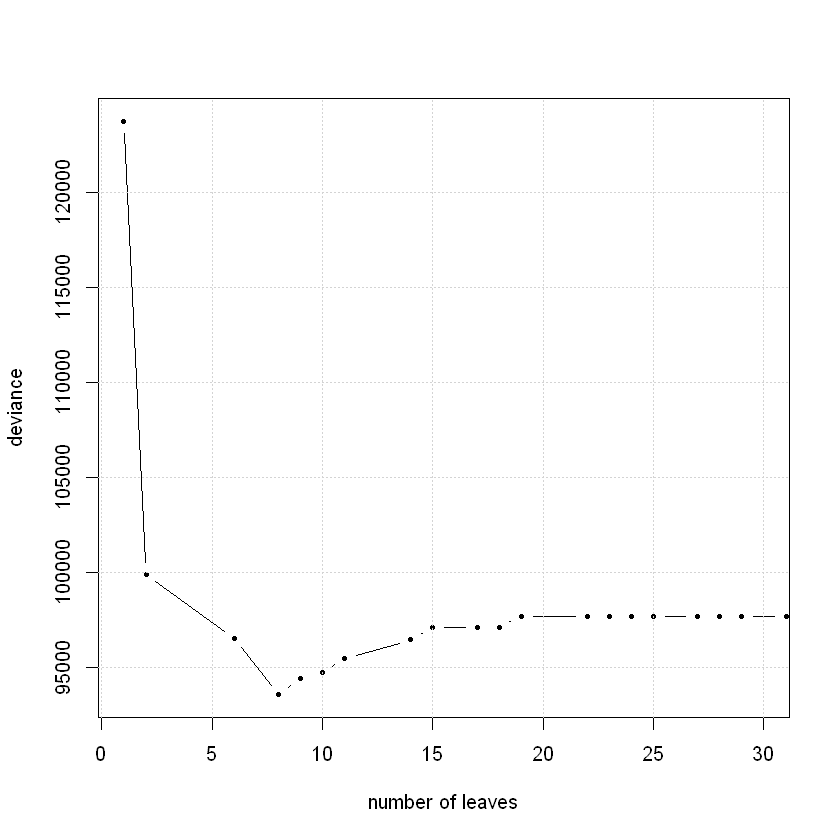

In [12]:
# Crossvalidation 10-fold
crossval_all = cv.tree(completeTree_all, K = 10)
plot(crossval_all$size, crossval_all$dev, type = "b",
     pch = 19, cex = 0.5, xlim = c(1,30),
     xlab = "number of leaves", ylab = "deviance")
grid()

Según la gráfica de desviación, el número óptimo de hojas es 8. Podamos el árbol completo con este número óptimo de hojas y lo representamos para estudiarlo.


Regression tree:
snip.tree(tree = completeTree_all, nodes = c(7L, 13L, 24L, 51L, 
8L, 5L, 9L))
Variables actually used in tree construction:
[1] "X284" "X285" "X305" "X4"   "X310"
Number of terminal nodes:  8 
Residual mean deviance:  20.56 = 76930 / 3742 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-20.2300  -0.9364  -0.2970   0.0000  -0.2970  49.8100 

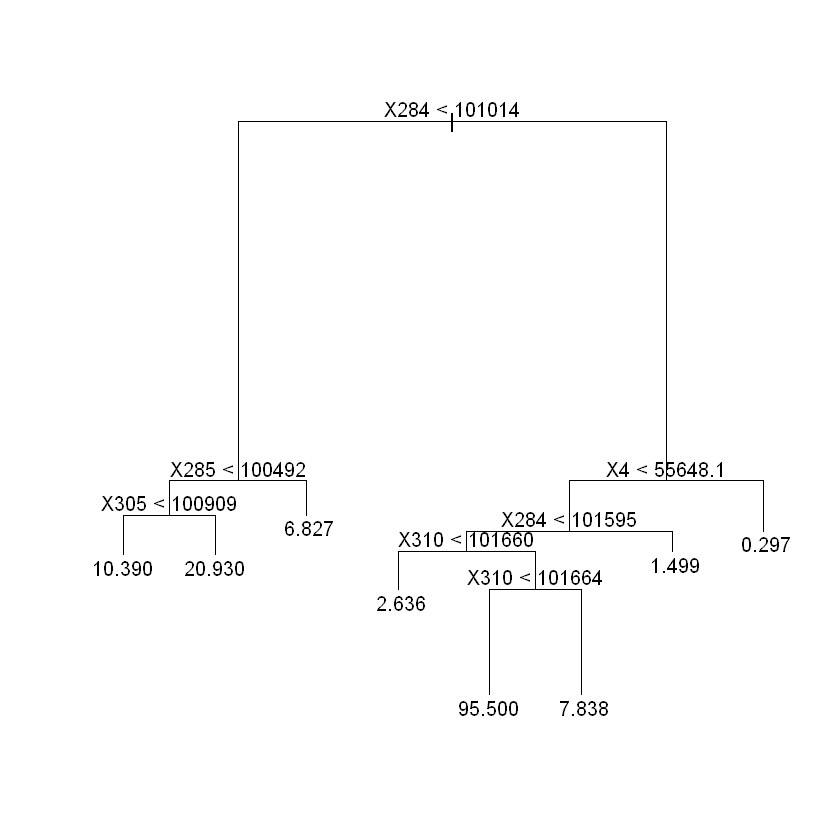

In [13]:
# Podamos el árbol completo para obtener el óptimo
n = 8
optTree_all = prune.tree(completeTree_all, best = n)
plot(optTree_all); text(optTree_all)
summary(optTree_all)

Como vemos, las variables predictoras más importantes siguen siendo X284, X285 y X4, y aparecen otras nuevas como X310 o X305.

#### Utiliza el árbol óptimo que acabas de encontrar para predecir en el test, y conserva la predicción obtenida.

In [14]:
# Predecimos sobre el conjunto de test
pred_opt_all = predict(optTree_all, df_all_Test)
str(pred_opt_all)

 Named num [1:1250] 1.5 10.39 2.64 1.5 1.5 ...
 - attr(*, "names")= chr [1:1250] "2" "4" "5" "8" ...


#### Repite el mismo proceso para el segundo árbol de regresión (el que sólo se entrena sobre los días de lluvia en el train).

In [15]:
# Creamos el dataset para el segundo árbol (sólo lluvia)
df_rain_Train = dfTrain[which(dfTrain$y>=1),]
df_rain_Test = dfTest # Porque el test lo cogemos entero.


Regression tree:
tree(formula = y ~ ., data = df_rain_Train, mincut = 1, minsize = 2, 
    mindev = 0)
Number of terminal nodes:  593 
Residual mean deviance:  0.01728 = 2.833 / 164 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2000  0.0000  0.0000  0.0000  0.0000  0.2167 

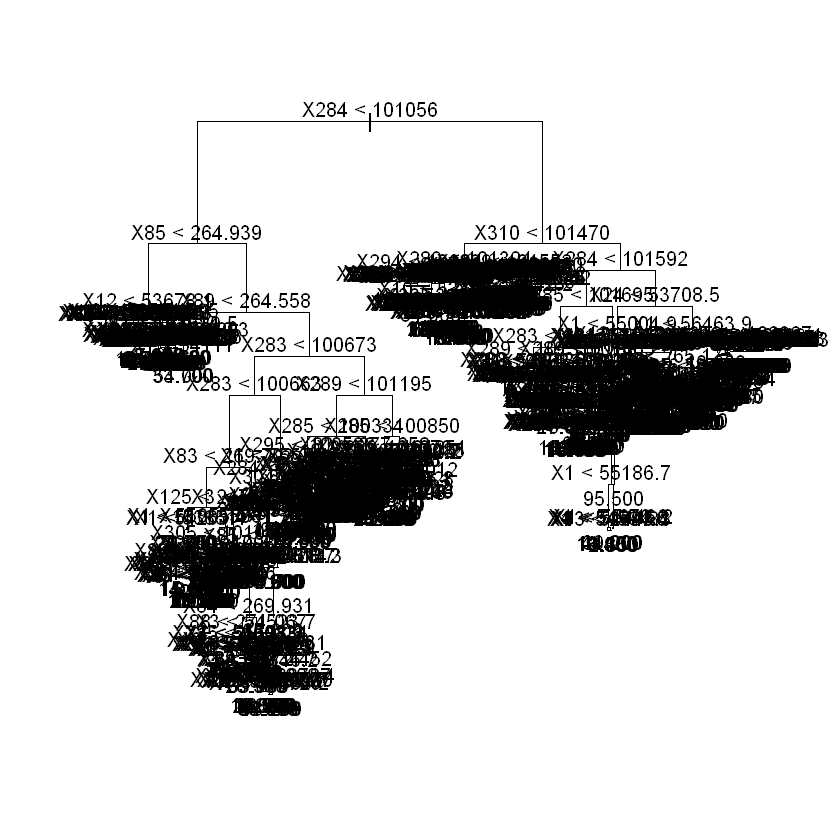

In [16]:
# Construimos el árbol completo
completeTree_rain = tree(y ~., df_rain_Train,
                    mincut = 1, minsize = 2, mindev = 0)
plot(completeTree_rain); text(completeTree_rain, pretty = F)
summary(completeTree_rain)

Obtenemos 593 hojas, un número cercano a la mitad del árbol completo considerando toda la serie. Tiene sentido que sea menor, ya que estamos entrenando con muchos menos puntos. En este caso, la variable predictora más importante continúa siendo X284, pero en el segundo nivel aparecen X85 y X310 tomando mayor importancia que la X4 que había aparecido en casos anteriores.

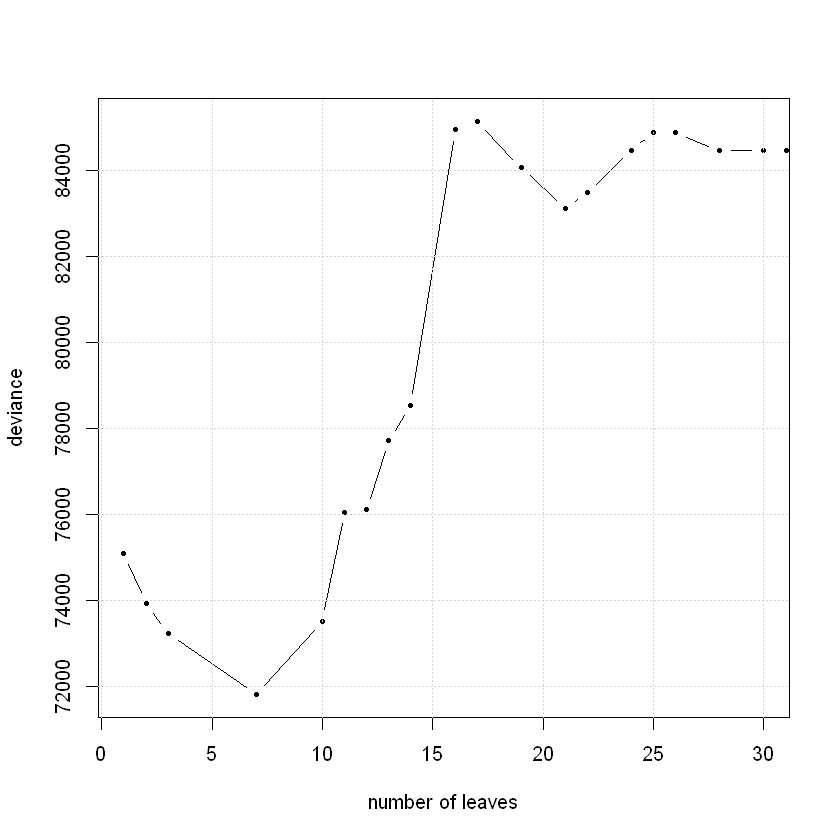

In [17]:
# Crossvalidation 10-fold
crossval_rain = cv.tree(completeTree_rain, K = 10)
plot(crossval_rain$size, crossval_rain$dev, type = "b",
     pch = 19, cex = 0.5, xlim = c(1,30),
     xlab = "number of leaves", ylab = "deviance")
grid()

Al realizar la crossvalidación para este caso, obtenemos que el número óptimo de hojas es 7. Entrenamos el árbol óptimo fijando dicho parámetro:


Regression tree:
snip.tree(tree = completeTree_rain, nodes = c(6L, 4L, 28L, 15L, 
58L, 5L))
Variables actually used in tree construction:
[1] "X284" "X85"  "X310" "X285" "X1"  
Number of terminal nodes:  7 
Residual mean deviance:  75.48 = 56610 / 750 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-12.980  -4.848  -2.448   0.000   2.735  52.120 

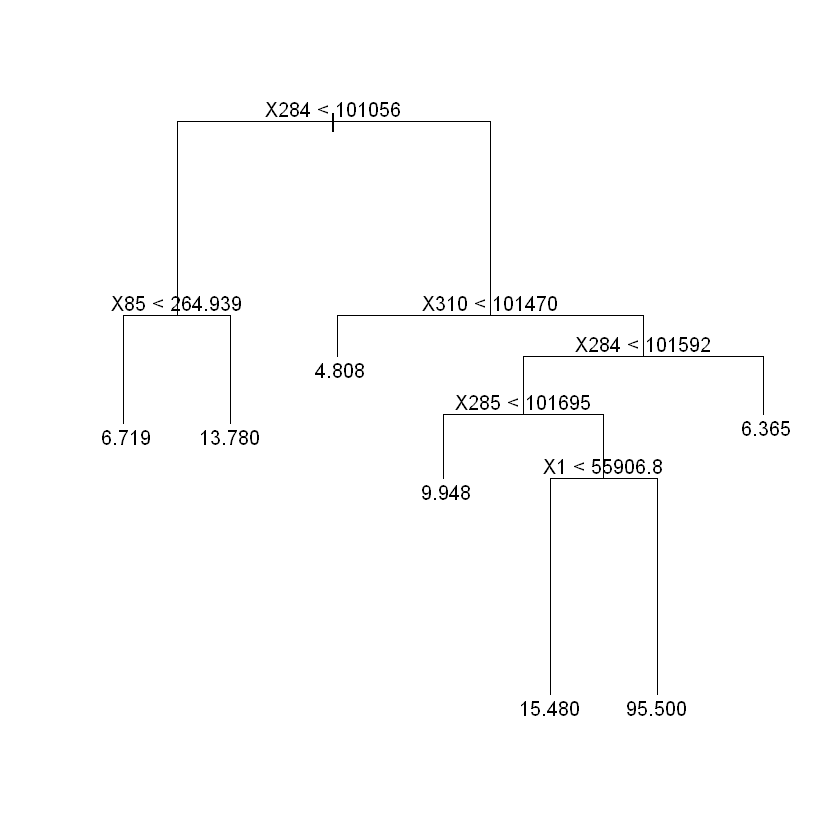

In [18]:
# Podamos el árbol completo para obtener el óptimo
n = 7
optTree_rain = prune.tree(completeTree_rain, best = n)
plot(optTree_rain); text(optTree_rain)
summary(optTree_rain)

Las variables de mayor importancia son X284 (nuevamente), X85 y X310, y observamos entre el resto de variables discriminatorias la variable X285 que ya había aparecido anteriormente, pero ahora en niveles más bajos, y la X1.

In [19]:
# Predecimos sobre el conjunto de test
pred_opt_rain = predict(optTree_rain, df_rain_Test)
str(pred_opt_rain)

 Named num [1:1250] 6.37 6.72 6.72 6.37 4.81 ...
 - attr(*, "names")= chr [1:1250] "2" "4" "5" "8" ...


#### Obtén las dos series predichas completas para el test (la secuencia lluvia/no lluvia será la misma en las dos) y valida tus resultados en función de las siguiente métricas:

* Para la parte binaria lluvia/no lluvia: Accuracy.
* Para la serie completa: RMSE, correlación de Spearman y ratio de varianzas.

Para obtener las series completas, multiplicamos la serie binaria de occurrencia por la serie entera o sólo lluvia, de manera que los 0's de la binaria anulan los días sin lluvia.

In [20]:
# Calculamos las series completas
pred_comp_all = as.numeric(pred_opt_occ) * pred_opt_all
pred_comp_rain = as.numeric(pred_opt_occ) * pred_opt_rain

Definimos también las métricas de error que vamos a utilizar. Para esta práctica, utilizaremos cuatro diferentes: Accuracy, para el caso binario, y RMSE (Root Mean Square Error), Correlación de Spearman y Ratio de Varianzas para el problema de regresión:
* **Accuracy**: Permite evaluar la tasa de aciertos en la predicción del evento binario. Utilizada para problemas de clasificación, se define a través de la matriz de confusión de la siguiente manera:
$$
acc = \frac{\sum_i M_{ii}}{L_c}
$$
donde $M$ es la matriz de confusión entre los predictandos (lluvia/no lluvia) del conjunto de datos y el conjunto de predicción, mientras que $L_c$ corresponde a la longitud del conjunto de test.

* **RMSE** (Root Mean Square Error): Es una medida de la distancia que existe entre la serie predicha $y^p$ y la serie original $y$. Se define como:

$$
\text{RMSE} = \sqrt{\sum_i\left(y_i^p-y_i\right)^2}
$$
de manera que cuanto más pequeño sea esta magnitud, más se asemejará la predicción a la serie original.

* **Correlación de Spearman**: Evalúa cómo de bien sigue la serie temporal predicha a la serie original, es decir, evalúa si las predicciones se dan en los momentos correctos, o si están desplazadas con respecto al conjunto de test. Así, como para cualquier valor de medida que involucre correlación, el resultado será mejor cuanto más se acerque a 1. En R, la calculamos mediante la función `cor()`.

* **Ratio de Varianzas**: Indica cómo se relacionan las varianzas de las series predicha y original, de manera que cuanto más próximo a 1 sea el valor de esta medida, más se asemejarán las variabilidades de los dos conjuntos. Se define como

$$
    RV = \frac{\text{var}(y^p)}{\text{var}(y)}
$$

In [21]:
# Definimos funciones para las métricas:
Accuracy = function(y, ypred){
    a = sum(diag(table(y, ypred))) / length(y)
    return(a)
}

RMSE = function(y, ypred){
    s = sqrt(mean((ypred - y)^2))
    return(s)
}

Spearman = function(y, ypred){
    c = cor(y, ypred, method = "spearman")
    return(c)
}

VarRatio = function(y, ypred){
    v = var(ypred)/var(y)
    return(v)
}

In [22]:
# Calculamos las métricas de error para cada una de las series predichas
acc_occ = Accuracy(df_occ_Test[,1], pred_opt_occ)

rmse_all = RMSE(df_all_Test[,1], pred_opt_all)
spearman_all = Spearman(df_all_Test[,1], pred_opt_all)
varratio_all = VarRatio(df_all_Test[,1], pred_opt_all)

dfResults_all = data.frame(rmse = rmse_all, spearman = spearman_all, varratio = varratio_all)

rmse_rain = RMSE(df_rain_Test[,1], pred_opt_rain)
spearman_rain = Spearman(df_rain_Test[,1], pred_opt_rain)
varratio_rain = VarRatio(df_rain_Test[,1], pred_opt_rain)

dfResults_rain = data.frame(rmse = rmse_rain, spearman = spearman_rain, varratio = varratio_rain)

In [23]:
cat("Resultados para la serie de ocurrencia")
acc_occ
cat("Resultados para la serie de precipitación entera")
dfResults_all
cat("Resultados para la serie de precipitación con los días de lluvia únicamente")
dfResults_rain

Resultados para la serie de ocurrencia

[1] 0.8448

Resultados para la serie de precipitación entera

rmse,spearman,varratio
4.806441,0.5932443,0.3503362


Resultados para la serie de precipitación con los días de lluvia únicamente

rmse,spearman,varratio
14.09913,0.2509253,4.453883


Para la ocurrencia del evento de lluvia obtenemos un valor de accuracy cerca de 0.85, un valor razonablemente bueno del que podemos extraer que se predice suficientemente bien. Los resultados del problema de regresión los estudiamos en el apartado a continuación.

#### Pregunta: ¿Cuál de los dos árboles da mejores resultados? ¿Por qué?

Para responder a la pregunta, analizamos los resultados de cada una de las métricas empleadas. Para la precipitación entera obtenemos mejores resultados con el RMSE y la correlación de Spearman, lo que nos indica que las predicciones son más acertadas para el primer árbol además de que sigue la serie temporal mucho mejor que el segundo. Con respecto al ratio de varianzas, observamos como es menor a la unidad para el primer árbol indicando que la serie predicha reduce la variabilidad con respecto a la original. Sin embargo, para el segundo árbol el ratio de varianzas es mucho mayor que la unidad, de manera que la variabilidad de la serie predicha es mucho mayor que en la original, lo cual no augura un resultado demasiado bueno.

En definitiva, y en base a las métricas de error definidas, el árbol que mejores predicciones hace es el construido considerando todos los datos de precipitación (lluvia y no lluvia). Es de esperar, ya que para el árbol de regresión entrenado únicamente con los días de lluvia estamos comparando las predicciones con un conjunto de test en el que tenemos tanto días de lluvia como de no lluvia, por lo que es normal que difiera más y los resultados sean peores.

## Random forests (2.5 puntos)

#### A continuación vamos a realizar el mismo ejercicio pero sustituyendo árboles individuales por random forests, empleando para ello en este ejercicio la técnica de “bagging”. Empecemos con el evento ocurrencia. Para estimar cuál sería el tamaño óptimo de nuestro random forest, prueba bosques de hasta 1000 árboles (utiliza la función randomForest) y plotea los errores “Out-Of-Bag” (OOB). ¿Con cuántos árboles te quedarías?

#### ***Nota:*** Hemos visto en la teoría que además del número de árboles, el otro parámetro a ajustar en los random forests es el número de predictores que se consideran en cada nodo para el splitting. En este ejemplo utlizaremos los valores típicos; n−−√ en problemas de clasificación y n/3 en problemas de predicción (siendo n el número total de predictores disponibles).

In [24]:
library("randomForest")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [25]:
rf = randomForest(yocc_Train ~., df_occ_Train, ntree = 1000)

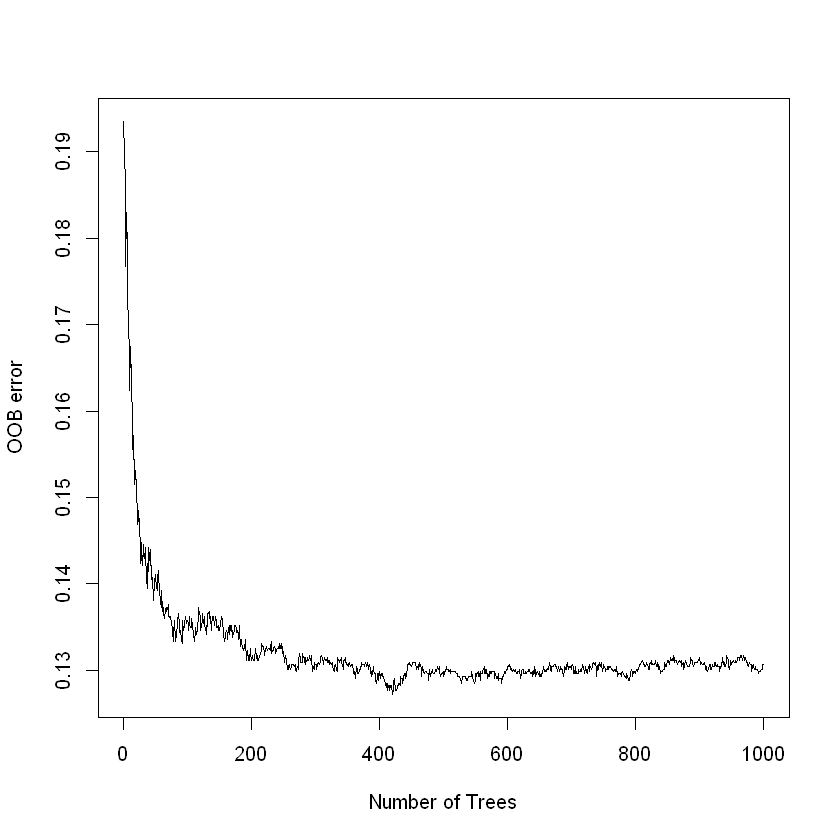

In [26]:
plot(rf$err.rate[, 1], type = "l",
     ylab = "OOB error", xlab = "Number of Trees")

Observamos que el error de Out of Bag comienza a estabilizarse más o menos a partir de los 400 árboles, de manera que tomamos nuestro bosque óptimo con 400 árboles.

#### Utiliza el bosque de tamaño óptimo parar predecir la ocurrencia en el test, y conserva la predicción.

In [27]:
# Entrenamos el bosque de tamaño óptimo:
opt = 400
rf_occ = randomForest(yocc_Train ~., df_occ_Train, ntree = opt)

In [28]:
pred_rf_occ = predict(rf_occ, df_occ_Test, type = "class")

#### Seguidamente, tal y como hicimos con los árboles individuales, vamos a crear dos random forests para la cantidad, uno que se entrene sobre todo el dataset de train y otro que se entrene sólo sobre los días de lluvia (en el train). De nuevo, tendrás que estimar cuál es el número óptimo de árboles en cada uno de ellos (prueba bosques de hasta 1000 árboles). ¿Qué tamaños óptimos obtienes?

Comenzamos entrenando y optimizando el árbol entero:

In [29]:
# Árbol entero
rf = randomForest(y ~., df_all_Train, ntree = 1000)

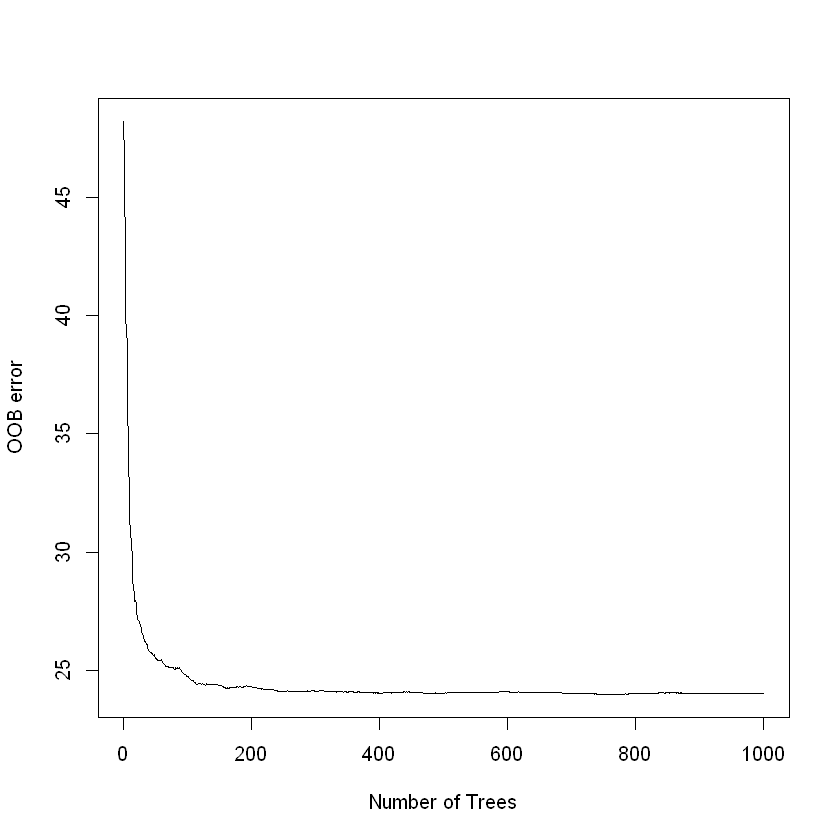

In [30]:
plot(rf$mse, type = "l",
     ylab = "OOB error", xlab = "Number of Trees")

Para este primer bosque de regresión podemos observar que el OOB error comienza a estabilizarse a partir de 200 árboles, de manera que este es el número que tomamos como óptimo.

In [31]:
# Entrenamos el bosque de tamaño óptimo:
opt = 200
rf_all = randomForest(y ~., df_all_Train, ntree = opt)

Ahora entrenamos y optimizamos el árbol que recoge únicamente los eventos de lluvia:

In [32]:
# Árbol lluvia
rf = randomForest(y ~., df_all_Train, ntree = 1000)

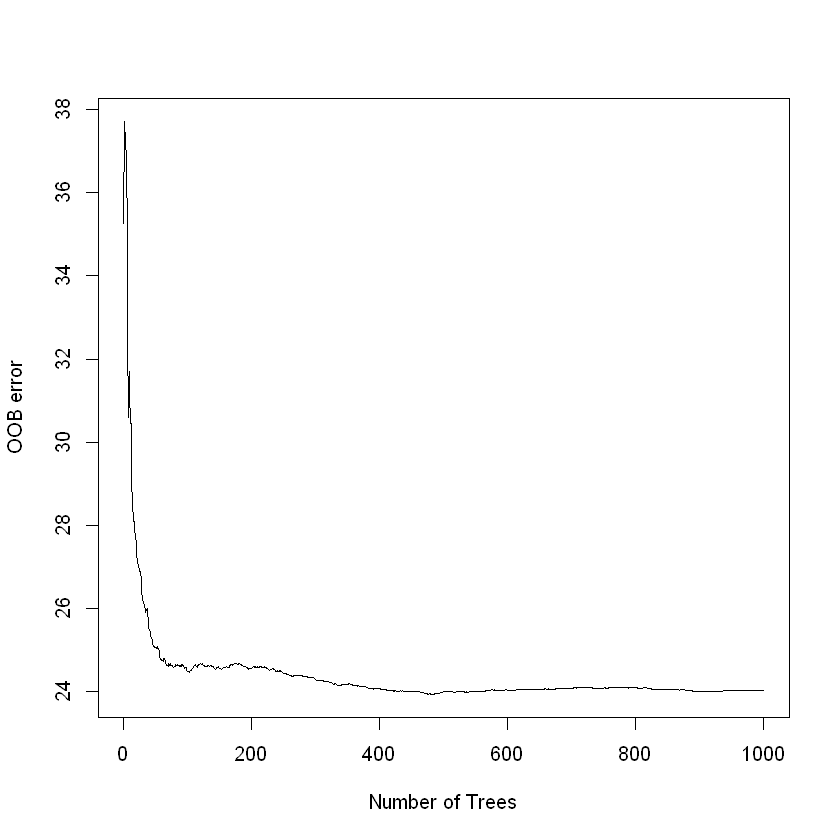

In [33]:
plot(rf$mse, type = "l",
     ylab = "OOB error", xlab = "Number of Trees")

Nuevamente, comienza a estabilizarse a partir de los 200 árboles, de manera que lo tomamos como óptimo.

In [34]:
# Entrenamos el bosque de tamaño óptimo:
opt = 200
rf_rain = randomForest(y ~., df_rain_Train, ntree = opt)

#### Utiliza los bosques óptimos encontrados para predecir la cantidad en el test, y conserva las predicciones obtenidas.

In [35]:
pred_rf_all = predict(rf_all, df_occ_Test)
pred_rf_rain = predict(rf_rain, df_occ_Test)

#### Construye las predicciones completas (ocurrencia×cantidad) de test y valídalas en función de las mismas métricas utilizadas en el apartado anterior.

In [36]:
# Calculamos las series completas
pred_comprf_all = as.numeric(pred_rf_occ) * pred_rf_all
pred_comprf_rain = as.numeric(pred_rf_occ) * pred_rf_rain

In [37]:
# Calculamos las métricas de error para cada una de las series predichas
acc_rf_occ = Accuracy(df_occ_Test[,1], pred_rf_occ)

rmse_rf_all = RMSE(df_all_Test[,1], pred_rf_all)
spearman_rf_all = Spearman(df_all_Test[,1], pred_rf_all)
varratio_rf_all = VarRatio(df_all_Test[,1], pred_rf_all)

dfResults_rf_all = data.frame(rmse = rmse_rf_all, spearman = spearman_rf_all, varratio = varratio_rf_all)

rmse_rf_rain = RMSE(df_rain_Test[,1], pred_rf_rain)
spearman_rf_rain = Spearman(df_rain_Test[,1], pred_rf_rain)
varratio_rf_rain = VarRatio(df_rain_Test[,1], pred_rf_rain)

dfResults_rf_rain = data.frame(rmse = rmse_rf_rain, spearman = spearman_rf_rain, varratio = varratio_rf_rain)

In [38]:
cat("Resultados para la serie de ocurrencia")
acc_rf_occ
cat("Resultados para la serie de precipitación entera")
dfResults_rf_all
cat("Resultados para la serie de precipitación con los días de lluvia únicamente")
dfResults_rf_rain

Resultados para la serie de ocurrencia

[1] 0.8632

Resultados para la serie de precipitación entera

rmse,spearman,varratio
4.651917,0.6305844,0.5260626


Resultados para la serie de precipitación con los días de lluvia únicamente

rmse,spearman,varratio
7.155533,0.3785032,0.4125969


En primer lugar, obtenemos un accuracy mayor al obtenido con el árbol de clasificación (recordamos, era de 0.8448), de manera que se confirma que la técnica de ensemble de Random Forest proporciona (ligeramente) mejores resultados que un único árbol de clasificación.

Como en el caso anterior con los árboles de regresión, obtenemos mejores resultados para la serie con todos los datos de precipitación: un menor RMSE, y una correlación de Spearman y ratio de varianzas más próximas a 1. Sin embargo, para el segundo árbol (considerando únicamente los días de lluvia) hemos obtenido mejoras notables en cuanto a las métricas en comparación con el árbol de regresión, hecho que estudiaremos más en profundidad a continuación.

#### Pregunta: Compara estos resultados con los obtenidos para árboles individuales. ¿Qué conclusiones obtienes de la comparación entre árboles individuales y random forests?

Comenzamos comparando los resultados obtenidos para la serie entera de precipitación:

In [39]:
rbind(tree_all = dfResults_all, forest_all = dfResults_rf_all)

,rmse,spearman,varratio
tree_all,4.806441,0.5932443,0.3503362
forest_all,4.651917,0.6305844,0.5260626


En general, los resultados obtenidos con el Random Forest son ligeramente mejores comparados con el árbol de regresión: un RMSE ligeramente menor, una correlación de Spearman un poquito más alta, pero sobre todo destaca el aumento del ratio de varianzas. Esto indica que ha aumentado la variabilidad de las predicciones, hecho que puede deberse a la gran variabilidad que presentan los árboles utilizados en el método de "bagging" (recordamos, son árboles con un sesgo muy pequeño pero al tener muchos la variabilidad es muy elevada).

Con respecto a la serie donde sólo se consideran los días de lluvia:

In [40]:
rbind(tree_rain = dfResults_rain, forest_rain = dfResults_rf_rain)

,rmse,spearman,varratio
tree_rain,14.099128,0.2509253,4.4538826
forest_rain,7.155533,0.3785032,0.4125969


Los resultado obtenidos con Random Forest son mejoran notablemente los del árbol de regresión, apreciándose sobre todo una disminución del RMSE (cerca de la mitad) y un ratio de varianzas más razonable. La correlación de Spearman mejora ligeramente pero sigue sin ser demasiado buena. Aunque los resultados mejoren al utilizar Random Forest, siguen siendo peores en comparación con la serie predicha utilizando todos los datos de precipitación, debido a los motivos expuestos en el apartado anterior (árboles de regresión).

## Modelos lineales generalizados (GLMs) (1.5 puntos)

#### Usaremos a continuación GLMs para el mismo problema abordado en los apartados anteriores. Como ya hemos visto en otras sesiones, debemos utilizar la familia binomial con función de enlace logit (regresión logística) para clasificación y la familia Gamma con función de enlace logarítmica para la cantidad.

#### Comenzamos con el modelo para la ocurrencia.

In [41]:
glm_occ = glm(yocc_Train ~ .,
              df_occ_Train,
              family = binomial(link = "logit"))

#### Una vez tenemos el modelo, lo utilizamos para predecir en el test. Tendremos que convertir la predicción probabilística obtenida en binaria (considera un umbral 0.5).

In [42]:
pred_glm_occ = predict(glm_occ,
                       df_occ_Test,
                       type = "response")
pred_glm_occ = ifelse(pred_glm_occ >= 0.5, 1, 0)
# hist(pred_glm_occ)

#### A continuación, ajustamos el modelo de cantidad. Para ello tenemos que seleccionar previamente los días de lluvia (la familia Gamma sólo acepta valores positivos).

In [43]:
glm_rain = glm(y ~ .,
              df_rain_Train,
              family = Gamma(link=log))

#### Utilizamos el modelo obtenido para predecir la cantidad en el test.

In [44]:
pred_glm_rain = predict(glm_rain,
                       df_rain_Test,
                       type = "response")

#### De nuevo, multiplicamos la ocurrencia por la cantidad para obtener la predicción completa en el test y la validamos en función de las métricas de validación que utilizamos para CART y random forests.

In [45]:
pred_glm_comp = as.numeric(pred_glm_occ) * pred_glm_rain

In [46]:
acc_glm = Accuracy(df_occ_Test[,1], pred_glm_occ)

In [47]:
rmse_glm = RMSE(df_rain_Test[,1], pred_glm_comp)
spearman_glm = Spearman(df_rain_Test[,1], pred_glm_comp)
varratio_glm = VarRatio(df_rain_Test[,1], pred_glm_comp)

dfResults_glm = data.frame(rmse = rmse_glm, spearman = spearman_glm, varratio = varratio_glm)
dfResults_glm

rmse,spearman,varratio
4.768495,0.6157391,0.9540246


#### Pregunta: Compara estos resultados con los obtenidos para CART y random forests. ¿Qué conclusiones obtienes?

Comenzamos por el problema de clasificación, calculando el accuracy obtenido mediante GLM:

In [48]:
rbind(accuracy_tree = acc_occ, 
      accuracy_forest = acc_rf_occ,
      accuracy_glm = acc_glm)

accuracy_tree,0.8448
accuracy_forest,0.8632
accuracy_glm,0.8680


Se observa un ligero aumento del accuracy en comparación con el Random Forest, por lo que podemos concluir que la regresión lineal es un mejor modelo para el problema de clasificación en comparación con los dos anteriores.

Comparamos los resultados obtenidos para el problema de regresión, utilizando únicamente la serie con días de lluvia, ya que GLM lo hemos entrenado sólo con esta serie:

In [49]:
rbind(tree_rain = dfResults_rain, forest_rain = dfResults_rf_rain, glm_rain = dfResults_glm)

,rmse,spearman,varratio
tree_rain,14.099128,0.2509253,4.4538826
forest_rain,7.155533,0.3785032,0.4125969
glm_rain,4.768495,0.6157391,0.9540246


Como podemos observar, la regresión lineal mejora todas las métricas: Disminuye el RMSE hasta valores cercanos a los obtenidos con los árboles de regresión entrenados con la serie de precipitación completa (ya hemos justificado en apartados anteriores por qué son mejores, por lo que obtener valores semejantes con este modelo es una gran mejora), aumenta ntoablemente la correlación de Spearman, acercándola a la unidad (casi el doble en comparación con el Random Forest) y finalmente obtenemos un ratio de varianzas prácticamente igual a 1, lo que nos indica que consigue preservar la variabilidad de una manera considerablemente buena.

## k nearest neighbors (k-NN) (1.5 puntos)

#### La última de las técnicas a utilizar será vecinos cercanos (ten en cuenta que en este caso ya no tendremos que predecir por separado ocurrencia y cantidad). Comenzaremos por una versión de k-NN en la que sólo se considere el vecino más cercano (utiliza la función knn.reg del paquete FNN).

#### Nota: Recuerda que en la técnica k-NN es muy importante pre-procesar adecuadamente (estandarizar) los predictores.

In [50]:
library(FNN)

In [51]:
predk1 = knn.reg(train = scale(dfTrain[,-1]),
               test = scale(dfTest[,-1]),
               y = dfTrain[,1],
               k = 1)

#### Como vimos en su día, el único parámetro a ajustar en la técnica k-NN es k (número de vecinos). Utilizaremos el paquete caret para encontrar el k óptimo en nuestro problema. Para ello, considera una cross-validación con 10 folds sobre el dataset de train y barre todos los k impares desde 1 a 50.

In [52]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin



Attaching package: 'caret'


The following object is masked _by_ '.GlobalEnv':

    RMSE




Tiempo de ejecución:  18.45418

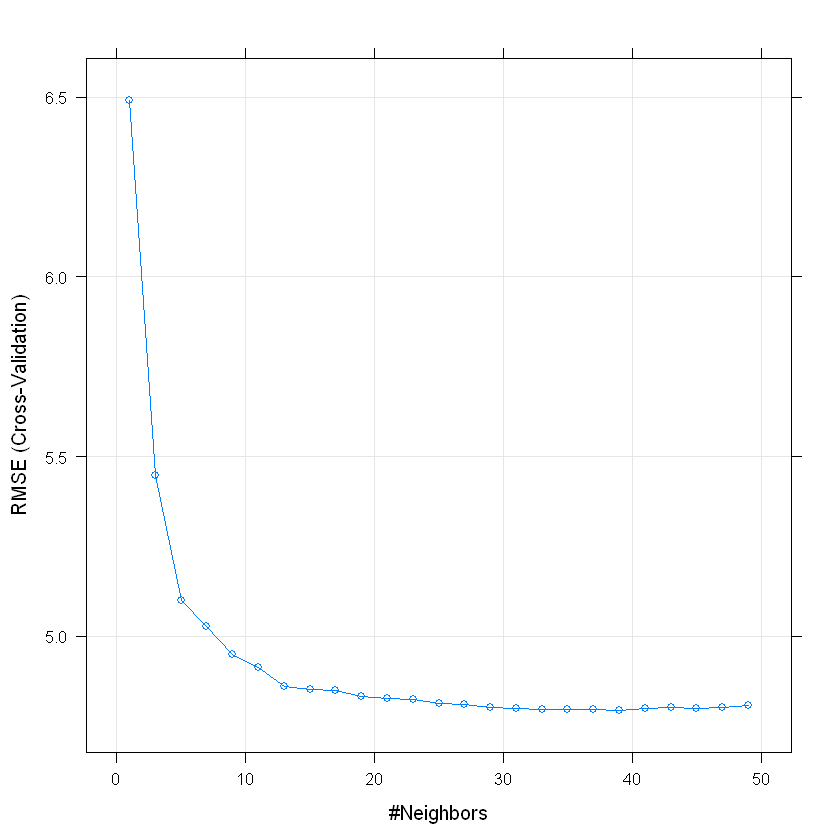

In [53]:
#Crossvalidation
grid = seq(1,50, by = 2)
trctrl = trainControl(method = "cv", number = 10)
t1 = Sys.time()
knnfit = train(y ~ ., dfTrain,
                method = "knn",
                trControl = trctrl,
                preProcess = c("center", "scale"),
                tuneGrid = expand.grid(k = grid))
t2 = Sys.time()
cat("Tiempo de ejecución: ", t2-t1)
plot(knnfit)

#### Utiliza este k óptimo para predecir en el test.

El k óptimo, según `caret` es

In [54]:
knnfit$bestTune$k

[1] 39

Sin embargo, en la gráfica observamos resultados similares para $k=19$. De hecho:

In [55]:
knnfit$results$RMSE[knnfit$results$k==19]
knnfit$results$RMSE[knnfit$results$k==27]

[1] 4.832675

[1] 4.809175

Apenas varía con respecto al `bestTune`. Como esta variación es tan pequeña, tomamos como k óptimo $k=19$ ya que el error cometido es parecido pero al ser un k menor reducimos costes computacionales, entrenando un modelo menos complejo. 

Así pues, entrenamos el modelo con nuestro k óptimo:

In [56]:
predk19 = knn.reg(train = scale(dfTrain[,-1]),
               test = scale(dfTest[,-1]),
               y = dfTrain[,1],
               k = 19)

#### Valida las dos predicciones (con k=1 y con k=óptimo) en el test, en función de las medidas que se han ido utilizando en los apartados anteriores.

In [57]:
# Resultados para k = 1
rmse_knn1 = RMSE(dfTest[,1], predk1$pred)
spearman_knn1 = Spearman(dfTest[,1], predk1$pred)
varratio_knn1 = VarRatio(dfTest[,1], predk1$pred)

dfResults_knn1 = data.frame(rmse = rmse_knn1, spearman = spearman_knn1, varratio = varratio_knn1)

In [58]:
# Resultados para k = 19
rmse_knn19 = RMSE(dfTest[,1], predk19$pred)
spearman_knn19 = Spearman(dfTest[,1], predk19$pred)
varratio_knn19 = VarRatio(dfTest[,1], predk19$pred)

dfResults_knn19 = data.frame(rmse = rmse_knn19, spearman = spearman_knn19, varratio = varratio_knn19)

#### Pregunta: ¿Qué diferencias obtienes entre las dos versiones utilizadas de la técnica k-NN? ¿A qué se deben?

In [59]:
dfResults_knn1
dfResults_knn19

rmse,spearman,varratio
6.074282,0.5265582,0.9534429


rmse,spearman,varratio
4.644802,0.6172963,0.3287607


Como podemos observar, el hecho de utilizar el número de vecinos óptimo hace que disminuya el RMSE (este hecho ya se apreciaba en la gráfica del crossvalidation, solo que entonces era sobre el conjunto de train y ahora es sobre el conjunto de test). También obtenemos una correlación de Spearman ligeramente superior. Sin embargo, resulta inquietante que para $k=1$ obtengamos un mucho mejor ratio de varianzas en comparación con el $k$ óptimo. No sabría explicar por qué sucede esto.

## Conclusiones generales (2 puntos)

A la vista de los resultados obtenidos, argumenta razonadamente qué técnica o técnicas serían las mejores para la predicción de lluvia en Lisboa. Justifica tu respuesta.

In [60]:
# Creamos el dataset de resultados finales
finalResults = rbind(tree_all = dfResults_all, tree_rain = dfResults_rain,
                     forest_all = dfResults_rf_all, forest_rain = dfResults_rf_rain,
                     glm_rain = dfResults_glm,
                     knn = dfResults_knn19)
finalResults

,rmse,spearman,varratio
tree_all,4.806441,0.5932443,0.3503362
tree_rain,14.099128,0.2509253,4.4538826
forest_all,4.651917,0.6305844,0.5260626
forest_rain,7.155533,0.3785032,0.4125969
glm_rain,4.768495,0.6157391,0.9540246
knn,4.644802,0.6172963,0.3287607


En un primer vistazo, podemos quedarnos con aquellas predicciones que tengan un RMSE menor que 5, es decir, descartar aquellas que tengan un RMSE demasiado alto: `tree_rain` y `forest_rain`.

In [61]:
rbind(tree_all = dfResults_all,
      forest_all = dfResults_rf_all,
      glm_rain = dfResults_glm,
      knn = dfResults_knn19)

,rmse,spearman,varratio
tree_all,4.806441,0.5932443,0.3503362
forest_all,4.651917,0.6305844,0.5260626
glm_rain,4.768495,0.6157391,0.9540246
knn,4.644802,0.6172963,0.3287607


Todos estos modelos presentan RMSE's muy similares, así que nos fijaremos en el resto de métricas. La correlación de Spearman también es muy similar para todos, siendo la mejor la de `forest_all` con $0.63$. Sin embargo, si nos fijamos en el ratio de varianzas, con `glm_rain` se obtiene una mejora muy significativa,  con un ratio muy próximo a 1.

Así, siendo mejor el RMSE y la correlación de Spearman para el Random Forest entrenado con todos los datos de precipitación `forest_all`, la enorme mejora en el ratio de varianzas me obliga a concluir que el mejor método para la predicción de la precipitación de lisboa es la regresión lineal entrenada con los días de lluvia `glm_rain`.